# Predict stroke : downsize (50:50)

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [302]:
# SOURCE : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv") 

In [303]:
df # 5110 rows × 12 columns

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [304]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [305]:
# drop id column
df.drop(columns = ["id"], inplace = True)

In [306]:
# check missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [307]:
print(df.gender.value_counts())# only one value is "other" as gender, therefore is removed
df = df[df["gender"]!="Other"].copy()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [308]:
# Convert 'hypertension', 'heart_disease' and 'stroke' to categorical column
df['hypertension'] = df['hypertension'].map({0:'No', 1:'Yes'})
df['heart_disease'] = df['heart_disease'].map({0:'No', 1:'Yes'})
df['stroke'] = df['stroke'].map({0:'No', 1:'Yes'})

In [309]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   object 
 3   heart_disease      5109 non-null   object 
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   object 
dtypes: float64(3), object(8)
memory usage: 479.0+ KB


In [311]:
df.groupby('gender')['bmi'].mean() # similar values 

gender
Female    29.065758
Male      28.647936
Name: bmi, dtype: float64

In [312]:
"""

# https://www.researchgate.net/figure/Age-range-classes-defined-by-the-Age-Ontology-Age-range-classes-were-generally-defined_fig1_51200368
# Create new category based on age range
conditions= [(df['age'] <=12), 
             (df['age'] >=13) & (df['age']<=18),
             (df['age'] >=19) & (df['age']<=24),
             (df['age'] >=25) & (df['age']<=45),
             (df['age'] >=46) & (df['age']<=64),
             (df['age'] >=65)
]

values= ['Child','Adolescent','Young adult','Adult', 'Middle aged','Aged']
df['age_category']= np.select(conditions,values)
"""


"\n\n# https://www.researchgate.net/figure/Age-range-classes-defined-by-the-Age-Ontology-Age-range-classes-were-generally-defined_fig1_51200368\n# Create new category based on age range\nconditions= [(df['age'] <=12), \n             (df['age'] >=13) & (df['age']<=18),\n             (df['age'] >=19) & (df['age']<=24),\n             (df['age'] >=25) & (df['age']<=45),\n             (df['age'] >=46) & (df['age']<=64),\n             (df['age'] >=65)\n]\n\nvalues= ['Child','Adolescent','Young adult','Adult', 'Middle aged','Aged']\ndf['age_category']= np.select(conditions,values)\n"

In [313]:
#sns.countplot(data = df , x ='age_category', order = ['Child','Adolescent','Young adult','Adult', 'Middle aged','Aged'])

In [314]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


# EDA

In [315]:
"""
# Plotting cathegorical data
cat_col = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_category']

for cat in cat_col:
    sns.countplot(data=df, x=cat, hue = "stroke")
    plt.show()
"""

'\n# Plotting cathegorical data\ncat_col = [\'gender\', \'ever_married\', \'work_type\', \'Residence_type\', \'smoking_status\', \'age_category\']\n\nfor cat in cat_col:\n    sns.countplot(data=df, x=cat, hue = "stroke")\n    plt.show()\n'

In [316]:
"""num_col = ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

for num in num_col:
    sns.histplot(data=df, x=num, hue='stroke')
    plt.show()
"""

"num_col = ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']\n\nfor num in num_col:\n    sns.histplot(data=df, x=num, hue='stroke')\n    plt.show()\n"

In [317]:
## dealing with missing value --> BMI column

In [318]:
#sns.pairplot(df)

In [319]:
# Check for outliers --> no outliers

In [320]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [321]:
df.stroke.value_counts()

stroke
No     4860
Yes     249
Name: count, dtype: int64

# Downsampling
The number of people with and without a stroke is imbalanced. There are ways to donwsample the majority class (i.e., remove some items of the "stroke == 0") 

Downsampling refers to removing records from majority classes in order to create a more balanced dataset. The simplest way of downsampling majority classes is by randomly removing records from that category. 

### ratio = 50/50

(4860, 11)
(249, 11)


<Axes: ylabel='Type'>

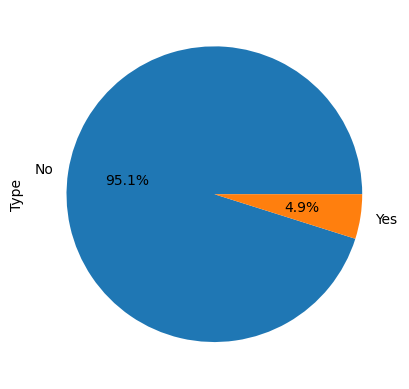

In [322]:
stroke_0 = df[df["stroke"] == 'No']
stroke_1 = df[df["stroke"] == 'Yes']
print(stroke_0.shape)
print(stroke_1.shape)

df.groupby('stroke').size().plot(kind='pie',
                                       y = "stroke",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [323]:
from sklearn.utils import resample

# Downsample majority class (stroke_0)
stroke_0_downsample = resample(stroke_0,
             replace=True,
             n_samples=len(stroke_1),
             random_state=42)

print(stroke_0_downsample.shape)

(249, 11)


stroke
No     249
Yes    249
Name: count, dtype: int64


<Axes: ylabel='Type'>

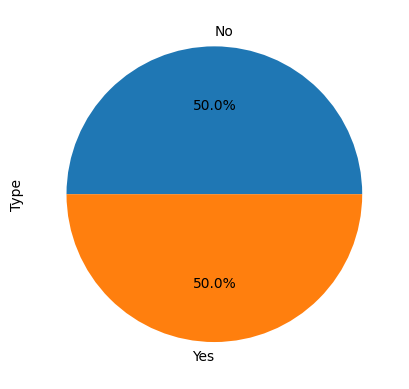

In [324]:
data_downsampled = pd.concat([stroke_0_downsample, stroke_1])

print(data_downsampled["stroke"].value_counts())

data_downsampled.groupby('stroke').size().plot(kind='pie',
                                       y = "stroke",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [325]:
data_downsampled.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1109,Female,27.0,No,No,No,Private,Urban,93.55,41.6,never smoked,No
4022,Female,81.0,Yes,No,Yes,Self-employed,Urban,181.23,36.7,never smoked,No
3342,Male,63.0,No,No,Yes,Self-employed,Urban,248.37,32.2,smokes,No
715,Female,28.0,Yes,No,No,Private,Rural,80.40,57.5,never smoked,No
4676,Female,28.0,No,No,No,Private,Urban,73.20,26.5,smokes,No


## Machine learning

In [327]:
data_downsampled.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [326]:
target_val = "stroke"
X = data_downsampled.drop(target_val, axis=1)
y = data_downsampled[target_val]

In [328]:
# Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [329]:
# Impute missing data, scale data and 

from sklearn.impute import SimpleImputer # imputing "mean" values when value is missing, it affects bmi column only 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


#preprocess num col 
num_col = ['avg_glucose_level', 'bmi', 'age']
#preprocess categorical columns
cat_col = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',  'smoking_status']

imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()
num_trans = make_pipeline(imputer, scaler)
cat_trans = OneHotEncoder(drop='if_binary')


# Transforming columns
preprocessor = make_column_transformer((num_trans, num_col), (cat_trans, cat_col))


In [330]:
# Selecting classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

In [331]:
# try out several classification models
classifiers = [
    LogisticRegression(max_iter = 1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_jobs = -1),
    SVC(),
    #BernoulliNB(),#: it gives an error if using GaussianNB() 
    KNeighborsClassifier(n_jobs = -1)
]


for classifier in classifiers:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator = pipe, param_grid = {}, cv = 5, scoring = 'accuracy')
    grid.fit(X_train, y_train)
    
    print(f"Train score for {classifier}: {grid.best_score_}")
    print("")

Train score for LogisticRegression(max_iter=1000): 0.7901449275362319

Train score for DecisionTreeClassifier(): 0.7356521739130435

Train score for RandomForestClassifier(n_jobs=-1): 0.7901863354037267

Train score for SVC(): 0.7815320910973085

Train score for KNeighborsClassifier(n_jobs=-1): 0.7441821946169772



### Summary 
with downsampling and 50/50 balance, we obtain the following values:
- __Train score for LogisticRegression(max_iter=1000): 0.7901449275362319__
- Train score for DecisionTreeClassifier(): 0.7356521739130435
- __Train score for RandomForestClassifier(n_jobs=-1): 0.7901863354037267__
- Train score for SVC(): 0.7815320910973085
- Train score for KNeighborsClassifier(n_jobs=-1): 0.7441821946169772

#### Many classifiers predicts very well --> pick 2 to compete against each other: LogisticRegression vs RandomForest

In [332]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, RocCurveDisplay


### Logistic regression

In [333]:
param_grid_logreg ={
    'logisticregression__C' : [0.1, 1, 2, 10]
}

classifier = LogisticRegression(max_iter = 1000)
pipe= make_pipeline(preprocessor, classifier)

grid_logreg =GridSearchCV(estimator = pipe, 
                          param_grid = param_grid_logreg,
                          cv = 5,
                          scoring = "accuracy")

grid_logreg.fit(X_train, y_train)

print(f"Best score: {grid_logreg.best_score_}")
print(f"Best params: {grid_logreg.best_params_}")

Best score: 0.8015734989648033
Best params: {'logisticregression__C': 0.1}


Precision score: 0.7534246575342466
Accuracy score: 0.7266666666666667
Recall score: 0.7051282051282052


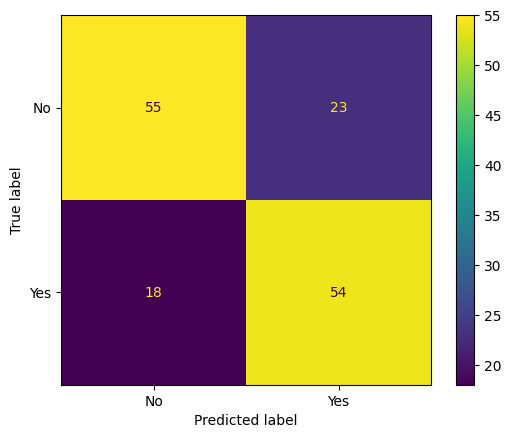

In [338]:
y_pred = grid_logreg.predict(X_test)

print(f"Precision score: {precision_score(y_test, y_pred, pos_label='No')}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Recall score: {recall_score(y_test, y_pred,  pos_label='No')}")

cm = confusion_matrix(y_test, y_pred, labels=grid_logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_logreg.classes_)

disp.plot()
plt.show()

###  Random Forest

In [349]:
param_grid_rf={
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : [1, 0.1,"auto", "sqrt"]  
}

classifier = RandomForestClassifier(n_jobs=-1)
pipe= make_pipeline(preprocessor, classifier)

grid_rf =GridSearchCV(estimator = pipe, 
                          param_grid = param_grid_rf,
                          cv = 5,
                          scoring = "accuracy")

grid_rf.fit(X_train, y_train)

print(f"Best score: {grid_rf.best_score_}")
print(f"Best params: {grid_rf.best_params_}")

Best score: 0.801656314699793
Best params: {'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 100}


Precision score: 0.7662337662337663
Accuracy score: 0.7533333333333333
Recall score: 0.7564102564102564


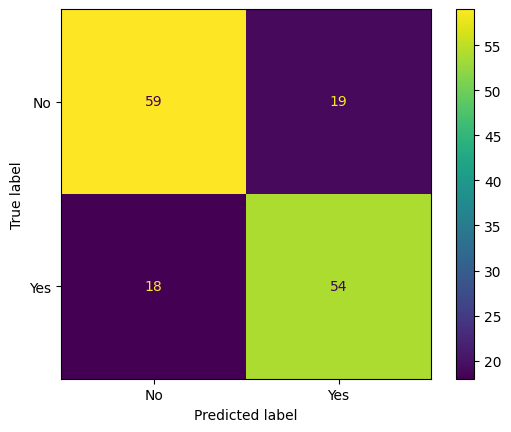

In [350]:
y_pred = grid_rf.predict(X_test)

print(f"Precision score: {precision_score(y_test, y_pred, pos_label='No')}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Recall score: {recall_score(y_test, y_pred, pos_label='No')}")

cm = confusion_matrix(y_test, y_pred, labels=grid_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_rf.classes_)

disp.plot()
plt.show()

### Descision tree

In [345]:
param_grid_dt = {'decisiontreeclassifier__min_samples_leaf':[1, 5, 10]}

classifier = DecisionTreeClassifier()
pipe = make_pipeline(preprocessor, classifier)

grid_dt = GridSearchCV(estimator = pipe,
                      param_grid = param_grid_dt,
                      cv = 5,
                      scoring = "accuracy")

grid_dt.fit(X_train, y_train)

print(f"Best score: {grid_dt.best_score_}")
print(f"Best params: {grid_dt.best_params_}")

Best score: 0.7702277432712215
Best params: {'decisiontreeclassifier__min_samples_leaf': 10}


Precision score: 0.7560975609756098
Accuracy score: 0.76
Recall score: 0.7948717948717948


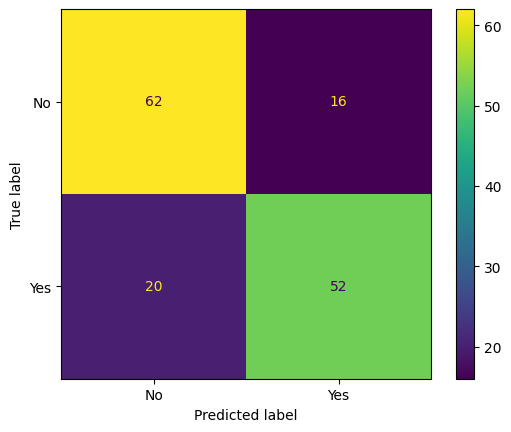

In [347]:
y_pred = grid_dt.predict(X_test)

print(f"Precision score: {precision_score(y_test, y_pred,pos_label='No')}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Recall score: {recall_score(y_test, y_pred, pos_label='No')}")

cm = confusion_matrix(y_test, y_pred, labels=grid_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_dt.classes_)

disp.plot()
plt.show()

### Which features influence the target the most?

In [ ]:
### Look for the feature that most influence the target (chi-squared statistical test)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.preprocessing import LabelEncoder

X_train2= X_train.copy()

number= LabelEncoder()
X_train2['gender']= number.fit_transform(X_train2['gender'])
X_train2['ever_married']= number.fit_transform(X_train2['ever_married'])
X_train2['work_type']= number.fit_transform(X_train2['work_type'])
X_train2['Residence_type']= number.fit_transform(X_train2['Residence_type'])
X_train2['smoking_status']= number.fit_transform(X_train2['smoking_status'])
X_train2['age_category']= number.fit_transform(X_train2['age_category'])
X_train2.head(5)



In [ ]:
### Look for the feature that most influence the target (chi-squared statistical test)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

pipe = make_pipeline(preprocessor, classifier)

X_train2 = X_train2.iloc[:,0:11] #all features 
Y_train2 = y_train #target


best_features= SelectKBest(score_func=chi2, k=3) #function that selects the top 3 features.
fit= best_features.fit(X_train2,Y_train2) 



#Creating dataframes for the features and the score of each feature.
stroke_scores= pd.DataFrame(fit.scores_)
stroke_columns= pd.DataFrame(X.columns)

#Create a data frame that combines all the features and their corresponding scores.
features_scores= pd.concat([stroke_columns, stroke_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')